In [73]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [74]:
def g(x):
    x1, x2 =x
    return 5 * np.e ** 2 - 4 * np.e * x1 + x1**2 + 2 * np.e * x2 + x2**2

def dg(x):
    return np.array([2*(x[0] - 2 * np.e), 2*(x[1]+np.e)])

def f(x):
    return np.sin(np.pi*x)+x**2

def df(x):
    return np.pi * np.cos(np.pi * x) + 2 * x

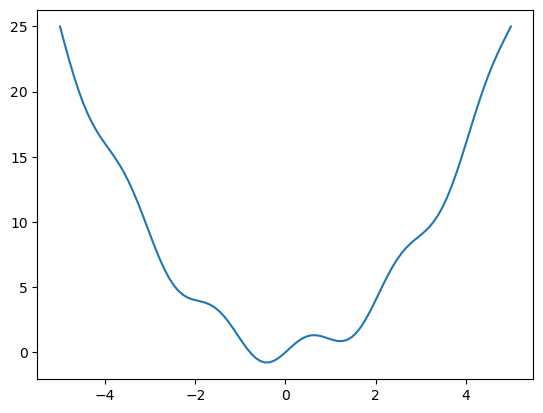

In [79]:
x = np.linspace(-5,5,100)
y = f(x)
plt.plot(x,y)
# plt.savefig(f'plots/functions/f_plot.png', dpi=300, bbox_inches='tight')
plt.show()


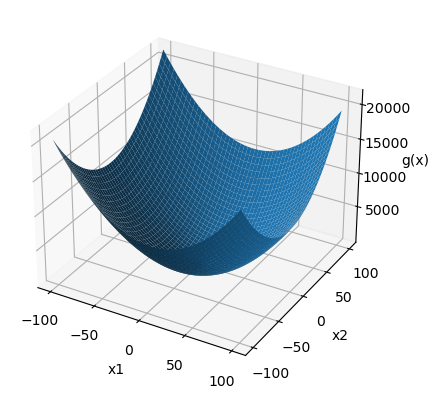

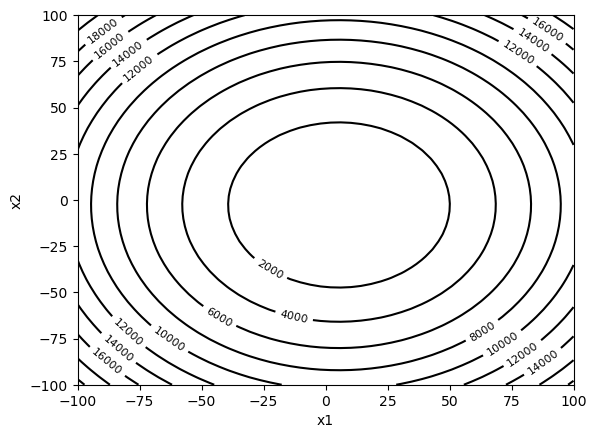

In [80]:
x1 = np.linspace(-100,100)
x2 = np.linspace(-100,100)
X1, X2 = np.meshgrid(x1, x2)


Z = g((X1,X2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X1, X2, Z)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('g(x)')

# ax.set_title('3D plot of g(x1,x2)')

plt.savefig(f'plots/functions/g_3d_plot.png', dpi=300, bbox_inches='tight')
plt.show()


plt.contourf(X1, X2, Z, levels=20, colors='white')
contour = plt.contour(X1, X2, Z, levels=10, colors='black')
plt.clabel(contour, inline=1, fontsize=8)



plt.xlabel('x1')
plt.ylabel('x2')
# plt.title('contour map of g(x1,x2)')
# plt.savefig(f'plots/functions/g_contour_map.png', dpi=300, bbox_inches='tight')
plt.show()

In [148]:
def fastestDescent(alfa, epsilon, startingPoint, gradient):
    valuesVector = startingPoint
    dimension = valuesVector.shape
    iterations = 1
    while np.linalg.norm(gradient(valuesVector[iterations-1]))>epsilon:
        valuesVector = np.vstack((valuesVector,np.zeros(dimension)))
        valuesVector[iterations] = valuesVector[iterations-1] - alfa * gradient(valuesVector[iterations-1])
        iterations +=1

    return valuesVector, iterations


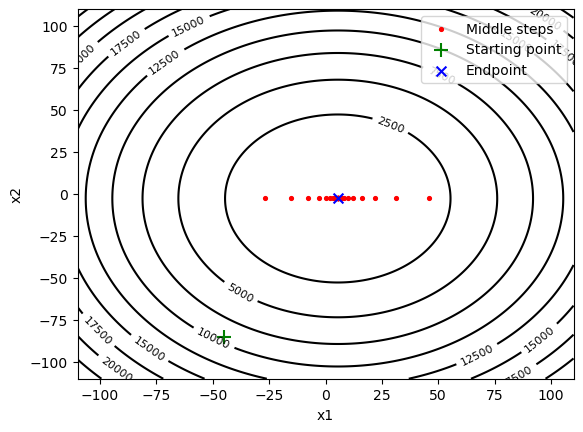

Start:   [-45. -85.]
Minimum:  (x1,x2) = [ 5.43227299 -2.71828183]
Function value in minimum: g(x1,x2) = 1.8409834591004426e-05
Iterations: 43


In [173]:
alfa = [0.1,0.9]
epsilon = 0.01
variableMin = -100
variableMax = 100
x1 = random.randint(variableMin,variableMax)
x2 = random.randint(variableMin,variableMax)
startingPoint = np.zeros([1,2])


startingPoint[0] = np.array([x1,x2])

X, iterations = fastestDescent(alfa, epsilon, startingPoint,dg)


x1 = np.linspace(variableMin*1.1, variableMax*1.1,1000)
x2 = np.linspace(variableMin*1.1, variableMax*1.1, 1000)
X1, X2 = np.meshgrid(x1, x2)

Z = g((X1, X2))
transposedX=X.transpose()

plt.contourf(X1, X2, Z, levels=20, colors='white')
contour = plt.contour(X1, X2, Z, levels=10, colors='black')
plt.clabel(contour, inline=1, fontsize=8)

plt.scatter(transposedX[0][1:-1], transposedX[1][1:-1], marker='.', color='red', label='Middle steps', s=30)
plt.scatter(transposedX[0][0], transposedX[1][0], marker='+', color='green', label='Starting point', s=100)
plt.scatter(transposedX[0][-1], transposedX[1][-1], marker='x', color='blue', label='Endpoint', s=50)

plt.xlabel('x1')
plt.ylabel('x2')
# plt.title('Contour map of g(x1,x2) with marked algorithm steps')

plt.legend()
plt.savefig(f'plots/process/2dim_alfa{alfa}_strt{X[0]}.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Start:   {X[0]}')
print(f'Minimum:  (x1,x2) = {X[-1]}')
print(f'Function value in minimum: g(x1,x2) = {g(X[-1])}')
print(f'Iterations: {iterations}')

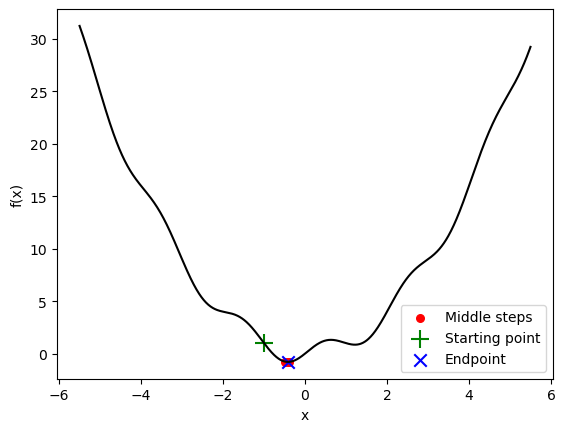

Start: -1.0
Minimum: x = [-0.41463696]
Function value in minimum: f(x) = [-0.79233203]
Iterations: 5


In [130]:
alfa = 0.1
epsilon = 0.01
variableMin = -5
variableMax = 5
x = np.array([random.randint(variableMin, variableMax)])
X, iterations = fastestDescent(alfa, epsilon, x, df)
variableLinspace = np.linspace(variableMin*1.1,variableMax*1.1,1000)
y = f(variableLinspace)


transposedX = np.transpose(X)[0]
stepsValues = f(transposedX)

plt.plot(variableLinspace,y,color='black')
plt.xlabel('x')
plt.ylabel('f(x)')
# plt.title('Plot f(x) with marked algorithm steps')


plt.scatter(transposedX[1:-1], stepsValues[1:-1], marker='.',color='red', label='Middle steps', s=120)
plt.scatter(transposedX[0], stepsValues[0], marker='+', color='green', label='Starting point', s=150)
plt.scatter(transposedX[-1], stepsValues[-1], marker='x', color='blue', label='Endpoint', s=80)


plt.legend()
plt.savefig(f'plots/process/1dim_alfa{alfa}_strt({X[0][0]}).png', dpi=300, bbox_inches='tight')
plt.show()
print(f'Start: {X[0][0]}')
print(f'Minimum: x = {X[-1]}')
print(f'Function value in minimum: f(x) = {f(X[-1])}')
print(f'Iterations: {iterations}')
